In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/16-22-49-RF-under_sampling_Typo3-RF_LC-12-12.csv')
df2 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/17-09-44-NB-under_sampling_Typo3-RF_LC-12-12.csv')
df3 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/17-15-32-SVM-under_sampling_Typo3-RF_LC-12-12.csv')    

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/15-22-43-RF-under_sampling_Ruby-RF_LC-12-12.csv')
df5 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/15-52-37-NB-under_sampling_Ruby-RF_LC-12-12.csv')
df6 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/15-55-57-SVM-under_sampling_Ruby-RF_LC-12-12.csv')

In [ ]:
df7 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/13-55-07-RF-under_sampling_Redmine-RF_LC-12-12.csv')
df8 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/12-19-37-NB-under_sampling_Redmine-RF_LC-12-12.csv')
df9 = pd.read_csv('/content/drive/MyDrive/SENG 607/Results/17-09-44-SVM-under_sampling_Redmine-RF_LC-12-12.csv')

In [ ]:
def conftoint(a):
  a = a.strip('[]')
  b = a.find('[')
  c = a.find(']')
  a = a.replace(a[b],'')
  a = a.replace(a[c],'')
  a = a.replace(' ','')
  l = list(map(int, a.split(',')))
  return l

def roi(df):
  tpv , fnv, fpv = 500,500,50
  cfix, clab, H, cR = 1, 0.5, 1, 400

  iter = df['Iteration'].values

  tp, fn, fp, benefit, ctr, cte, cost2, roi, n1 = [] , [] , [], [], [], [], [], [], []
  rela = df['#Rela'].values
  ind  = df['#Ind'].values
  train = df['Training'].values
  test = df['Testing'].values
  f1   = df['f1'].values

  for i in range(19):
    a = df['ConfusionM'][i]
    s = conftoint(a)

    tp.append(s[3])
    fn.append(s[1])
    fp.append(s[2])
    ben = (tp[i]*tpv) - (fn[i]*fnv) - (fp[i]*fpv)
    benefit.append(ben)
    
    ctrain = ((cfix+clab)*H*cR*train[i])/60
    ctest  = ((cfix)*H*cR*test[i])/60
    cost1 = (ctrain+ctest)
    ctr.append(ctrain)
    cte.append(ctest)
    cost2.append(cost1)

    r = (benefit[i] - cost2[i] )/ (cost2[i])
    roi.append(r)

    n = (train[i]/(train[i]+test[i]))*100
    n1.append(n)
    
  df1 = pd.DataFrame({'Iteration':iter,'Rela':rela,'Ind':ind,'Training':train,'Testing':test,'TP':tp,'FN':fn,'FP':fp,'CostTrain':ctr,'CostTest':cte,'Cost':cost2,'Benefit':benefit,'ROI':roi,'F1':f1,'N%':n1})

  x = df1['N%']
  y1 = df1['ROI']
  y2 = df1['F1']

  z = ['F1']
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  curve1 = ax1.plot(x,y2,label='F1',color='g')
  curve2 = ax2.plot(x,y1,label='ROI',color='r')
  ax1.legend(labels=z)
  ax1.set_xlabel('Relative size training set(%)')
  ax1.set_ylabel('F1')
  plt.ylabel('ROI')
  plt.plot()
  plt.legend()
  plt.grid()
  plt.show()

  


  tp, fn, fp, benefit, ctr, cte, cost2, roi, n1 = [] , [] , [], [], [], [], [], [], []

  LMrela = df['#LM Rela'].values
  LMind  = df['#LM Ind'].values
  LMtrain = df['#LM Training'].values
  LMtest = df['#LM Testing'].values
  LMf1   = df['LM f1'].values

  for i in range(19):
    a = df['LM ConfusionM'][i]
    s = conftoint(a)

    tp.append(s[3])
    fn.append(s[1])
    fp.append(s[2])
    ben = (tp[i]*tpv) - (fn[i]*fnv) - (fp[i]*fpv)
    benefit.append(ben)
    
    ctrain = ((cfix+clab)*H*cR*LMtrain[i])/60
    ctest  = ((cfix)*H*cR*LMtest[i])/60
    cost1 = (ctrain+ctest)
    ctr.append(ctrain)
    cte.append(ctest)
    cost2.append(cost1)

    r = (benefit[i] - cost2[i] )/ (cost2[i])
    roi.append(r)

    n = (LMtrain[i]/(LMtrain[i]+LMtest[i]))*100
    n1.append(n)

  df2 = pd.DataFrame({'Iteration':iter,'LM Rela':LMrela,'LM Ind':LMind,'LM Training':LMtrain,'LM Testing':LMtest,'LM TP':tp,'LM FN':fn,'LM FP':fp,'LM CostTrain':ctr,'LM CostTest':cte,'LM Cost':cost2,'LM Benefit':benefit,'LM ROI':roi,'LM F1':LMf1,'N%':n1})

  x = df2['N%']
  y1 = df2['LM ROI']
  y2 = df2['LM F1']
  
  z = ['F1']
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  curve1 = ax1.plot(x,y2,label='F1',color='g')
  curve2 = ax2.plot(x,y1,label='ROI',color='r')
  ax1.legend(labels=z)
  ax1.set_xlabel('Relative size training set(%)')
  ax1.set_ylabel('F1')
  plt.ylabel('ROI')
  plt.plot()
  plt.grid()
  plt.legend()
  plt.show()

  return df1,df2

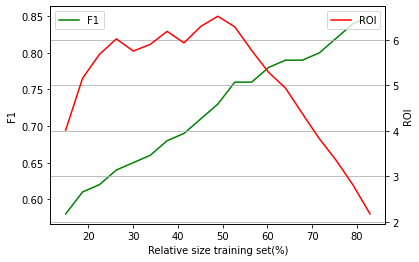

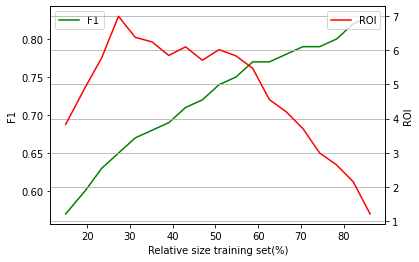

In [ ]:
df = roi(df1)

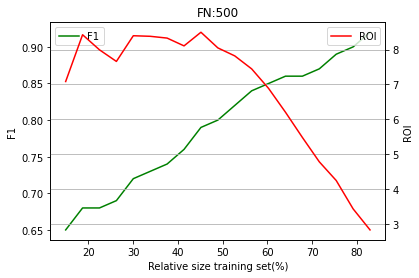

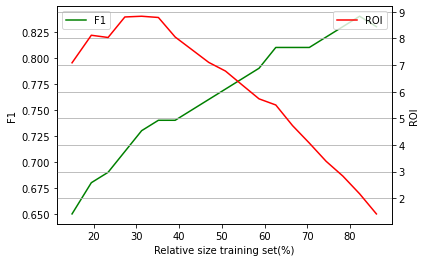

In [ ]:
df = roi(df2)

In [ ]:
df

(    Iteration  Rela   Ind  Training  ...  Benefit        ROI    F1         N%
 0           1   198   198       396  ...   400600  20.113844  0.65  14.954683
 1           2   248   248       496  ...   429800  21.261740  0.68  18.731118
 2           3   298   298       596  ...   410350  19.893585  0.68  22.507553
 3           4   348   348       696  ...   396800  18.866489  0.69  26.283988
 4           5   398   398       796  ...   407750  19.079613  0.72  30.060423
 5           6   448   448       896  ...   403350  18.542151  0.73  33.836858
 6           7   498   498       996  ...   399700  18.057533  0.74  37.613293
 7           8   548   548      1096  ...   388150  17.217303  0.76  41.389728
 8           9   598   598      1196  ...   396650  17.329482  0.79  45.166163
 9          10   648   648      1296  ...   376750  16.145783  0.80  48.942598
 10         11   698   698      1396  ...   365050  15.365063  0.82  52.719033
 11         12   748   748      1496  ...   347550  

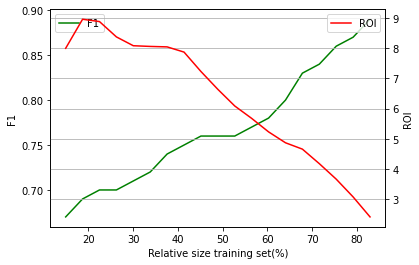

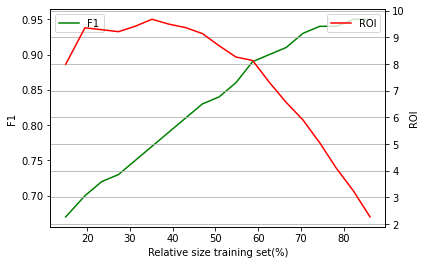

In [ ]:
df = roi(df3)

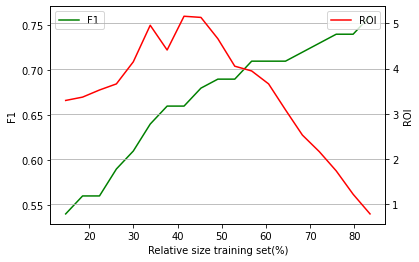

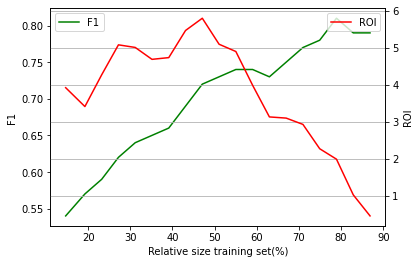

In [ ]:
df = roi(df4)

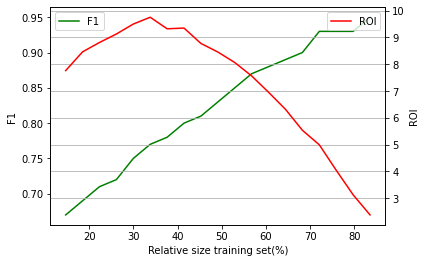

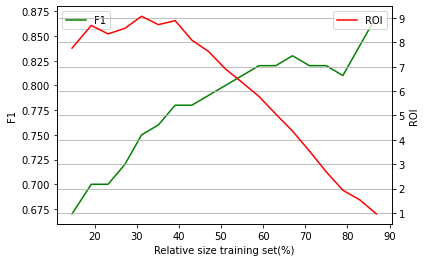

In [ ]:
df = roi(df5)

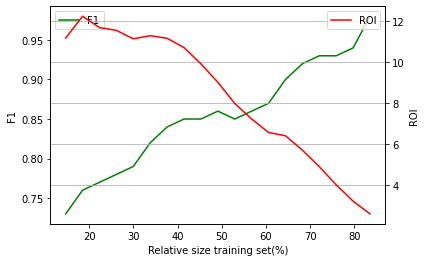

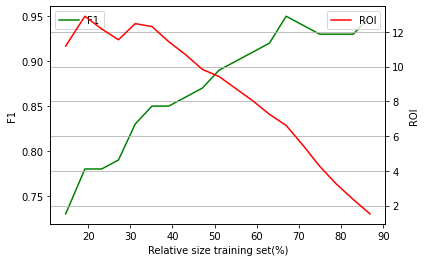

In [ ]:
df = roi(df6)

In [ ]:
def conftoint(a):
  a = a.strip('[]')
  b = a.find('[')
  c = a.find(']')
  a = a.replace(a[b],'')
  a = a.replace(a[c],'')
  a = a.replace(' ','')
  l = list(map(int, a.split(',')))
  return l

def roi_class3(df):
  tpv , fnv, fpv = 500,500,50
  tpv1 , fnv1, fpv1 = 500,500,50
  cfix, clab, H, cR = 1, 0.5, 1, 400

  iter = df['Iteration'].values

  tp, fn, fp, benefit, ctr, cte, cost2, roi, n1, tp1, fn1, fp1, benefit1, Benefit = [] , [] , [], [], [], [], [], [], [], [], [], [], [], []
  rela = df['#Rela'].values
  dup  = df['#Dupl'].values
  train = df['Training'].values
  test = df['Testing'].values
  f1   = df['f1'].values

  for i in range(19):
    a = df['ConfusionM'][i]
    s = conftoint(a)

    tp.append(s[8])
    fn.append(s[2]+s[5])
    fp.append(s[6]+s[7])
    ben = (tp[i]*tpv) - (fn[i]*fnv) - (fp[i]*fpv)
    benefit.append(ben)

    tp1.append(s[0])
    fn1.append(s[3]+s[6])
    fp1.append(s[1]+s[2])
    ben1 = (tp1[i]*tpv) - (fn1[i]*fnv) - (fp1[i]*fpv)
    benefit1.append(ben1)

    Benefit.append((ben+ben1)/2)
    
    ctrain = ((cfix+clab)*H*cR*train[i])/60
    ctest  = ((cfix)*H*cR*test[i])/60
    cost1 = (ctrain+ctest)
    ctr.append(ctrain)
    cte.append(ctest)
    cost2.append(cost1)

    r = (Benefit[i] - cost2[i] )/ (cost2[i])
    roi.append(r)

    n = (train[i]/(train[i]+test[i]))*100
    n1.append(n)
  
  df1 = pd.DataFrame({'Iteration':iter,'Rela':rela,'Dup':dup,'Training':train,'Testing':test,'TP':tp,'FN':fn,'FP':fp,'CostTrain':ctr,'CostTest':cte,'Cost':cost2,'Benefit':Benefit,'ROI':roi,'F1': f1,'N%':n1})

  x = df1['N%']
  y1 = df1['ROI']
  y2 = df1['F1']

  z = ['F1']
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  curve1 = ax1.plot(x,y2,label='F1',color='g')
  curve2 = ax2.plot(x,y1,label='ROI',color='r')
  ax1.legend(labels=z)
  ax1.set_xlabel('Relative size training set(%)')
  ax1.set_ylabel('F1')
  plt.ylabel('ROI')
  plt.plot()
  plt.legend()
  plt.grid()
  plt.show()

  


  tp, fn, fp, benefit, ctr, cte, cost2, roi, n1, tp1, fn1, fp1, benefit1, Benefit = [] , [] , [], [], [], [], [], [], [], [], [], [], [], []

  LMrela = df['#LM Rela'].values
  LMind  = df['#LM Dupl'].values
  LMtrain = df['#LM Training'].values
  LMtest = df['#LM Testing'].values
  LMf1   = df['LM f1'].values

  for i in range(19):
    a = df['LM ConfusionM'][i]
    s = conftoint(a)

    tp.append(s[8])
    fn.append(s[2]+s[5])
    fp.append(s[6]+s[7])
    ben = (tp[i]*tpv) - (fn[i]*fnv) - (fp[i]*fpv)
    benefit.append(ben)

    tp1.append(s[0])
    fn1.append((s[3]+s[6]))
    fp1.append((s[1]+s[2]))
    ben1 = (tp1[i]*tpv) - (fn1[i]*fnv) - (fp1[i]*fpv)
    benefit1.append(ben1)

    Benefit.append((ben+ben1)/2)


    ctrain = ((cfix+clab)*H*cR*LMtrain[i])/60
    ctest  = ((cfix)*H*cR*LMtest[i])/60
    cost1 = (ctrain+ctest)
    ctr.append(ctrain)
    cte.append(ctest)
    cost2.append(cost1)

    r = (Benefit[i] - cost2[i] )/ (cost2[i])
    roi.append(r)

    n = (LMtrain[i]/(LMtrain[i]+LMtest[i]))*100
    n1.append(n)

  df2 = pd.DataFrame({'Iteration':iter,'LM Rela':LMrela,'LM Ind':LMind,'LM Training':LMtrain,'LM Testing':LMtest,'LM TP':tp,'LM FN':fn,'LM FP':fp,'LM CostTrain':ctr,'LM CostTest':cte,'LM Cost':cost2,'LM Benefit':Benefit,'LM ROI':roi,'LM F1':LMf1,'N%':n1})

  x = df2['N%']
  y1 = df2['LM ROI']
  y2 = df2['LM F1']
  
  z = ['F1']
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  curve1 = ax1.plot(x,y2,label='F1',color='g')
  curve2 = ax2.plot(x,y1,label='ROI',color='r')
  ax1.legend(labels=z)
  ax1.set_xlabel('Relative size training set(%)')
  ax1.set_ylabel('F1')
  plt.ylabel('ROI')
  plt.plot()
  plt.grid()
  plt.legend()
  plt.show()

  return df1,df2

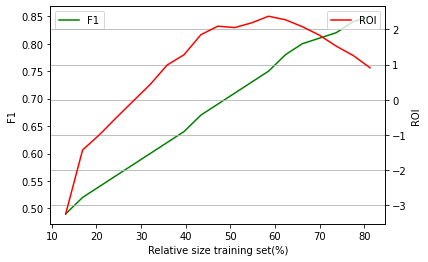

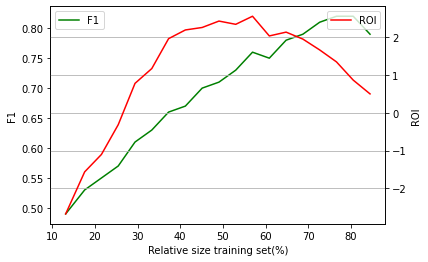

In [ ]:
d1 = roi_class3(df7)

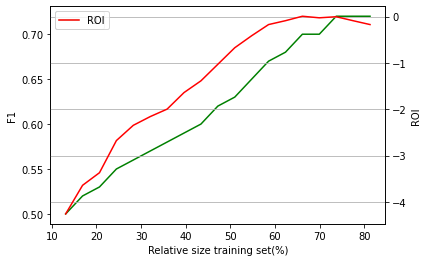

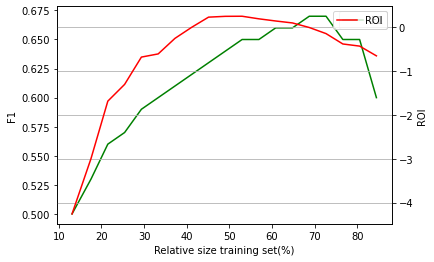

In [ ]:
d1 = roi_class3(df8)

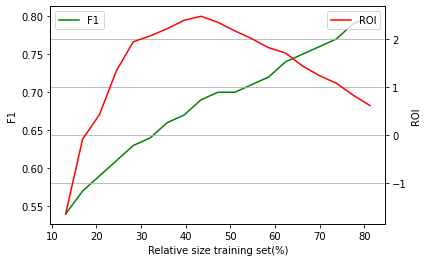

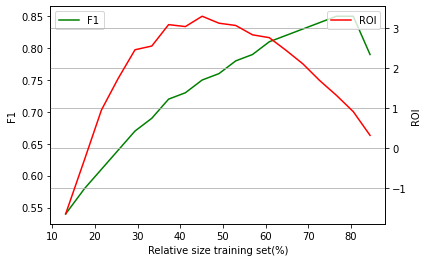

In [ ]:
d1 = roi_class3(df9)